# Cloudflare Free User Exploratory Data Analysis

Author: Tim Cho

Date: Jan 25, 2022

For this sample case study, I hope to demonstrate how I would approach this problem of "What behaviors can we observe from a client that is more likely to convert from a free plan to a paid subscription?"

Note that for this exercise, I am using a randomly generated set of data from https://generatedata.com/generator. 

### Import appropriate packages

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Reading the .csv file
Using head() function to do some exploratory data analysis

In [18]:
df = pd.read_csv('DATA.csv')
df.head()

,COMPANY_NAME,PHONE_NUM,EMAIL,ZIPCODE,REGION,EMPLOYEES,WAF,ARGO_SMARTROUTE,LOAD_BALANCING,2021_REVENUE,DAYS_UNTIL_CONVERT
0,Risus In Mi Foundation,(432) 756-4245,ac.urna@outlook.edu,2976,Western Australia,4768,Yes,No,Yes,4951701,214
1,Lobortis Quis LLC,1-989-506-1165,vel.lectus.cum@protonmail.couk,24107,Mecklenburg-Vorpommern,4187,No,Yes,Yes,5234528,17
2,Malesuada Corp.,(613) 485-3016,enim.curabitur.massa@yahoo.edu,33-832,Akwa Ibom,1196,Yes,Yes,Yes,7613816,125
3,Adipiscing Elit Associates,(628) 232-1618,eu.enim@outlook.com,694823,Maine,3523,No,No,No,5712521,68
4,Vivamus Associates,(114) 968-6272,adipiscing.elit@aol.edu,42-967,Chocó,3877,No,Yes,No,831097,61


In [19]:
df_dict = pd.read_csv('DATA_DICTIONARY.csv')
df_dict

,COMPANY_NAME,Client Name
0,PHONE_NUM,Client Phone Number
1,EMAIL,Client Email
2,ZIPCODE,Client Zipcode
3,REGION,Client Region
4,EMPLOYEES,Total Employee Count
5,WAF,Using Cloudflare WAF
6,ARGO_SMARTROUTE,Using Cloudflare ARGO Smart Routing
7,LOAD_BALANCING,Using Cloudflare load balancing
8,2021_REVENUE,Total Reported Revenue for 2021
9,DAYS_UNTIL_CONVERT,Total Count of Days Until Conversion from Free...


### Exploring the relationship between data

Now that I have some basic idea of how the dataframe is structured, I am moving onto the first question:
1. What are the top 10 companies that took the least amount of time to convert?

In [20]:
# We are intersetd in df['DAYS_UNTIL_CONVERT'] to determine which clients took how many days to convert

df.sort_values('DAYS_UNTIL_CONVERT', ascending = True).head(10)

,COMPANY_NAME,PHONE_NUM,EMAIL,ZIPCODE,REGION,EMPLOYEES,WAF,ARGO_SMARTROUTE,LOAD_BALANCING,2021_REVENUE,DAYS_UNTIL_CONVERT
175,Fringilla Ltd,1-888-682-1167,massa.mauris@protonmail.edu,T9V 4G2,Kerala,3099,No,Yes,No,3476080,1
407,Libero Nec Inc.,(831) 658-9108,natoque@aol.edu,5528 RU,Aisén,1319,No,No,Yes,6258569,1
224,Magna Cras Convallis LLC,(732) 577-4274,mollis.nec.cursus@yahoo.edu,3511,Alsace,1025,Yes,No,No,7378003,1
386,Senectus Et Corp.,1-594-154-8853,quis.diam@hotmail.ca,86712,Oslo,600,No,Yes,Yes,7705718,2
200,Eu Company,1-428-455-6780,phasellus.libero@protonmail.ca,760416,Illes Balears,1128,Yes,No,Yes,7237590,4
135,Sem LLP,1-395-366-6523,et.magnis.dis@icloud.net,63414,Vlaams-Brabant,3218,Yes,No,No,6850960,4
55,Tellus Foundation,(225) 250-0357,parturient@hotmail.edu,51806,Sikkim,4140,Yes,Yes,No,4212863,5
422,Semper Dui LLP,(827) 850-9153,ultricies.ligula@aol.org,44463,Principado de Asturias,3158,No,Yes,No,1334152,5
36,Curabitur Ut Institute,(541) 311-5465,sapien@aol.ca,26459,Xīnán,2609,Yes,No,No,2885512,6
298,Tempor Diam Corp.,(445) 269-0232,habitant@yahoo.ca,685164,Khyber Pakhtoonkhwa,3058,No,No,No,9348143,6


In [21]:
# these are the clients with lowest amount of days until conversion into premium plan

print(df.sort_values('DAYS_UNTIL_CONVERT', ascending = True).head(10)['COMPANY_NAME'])

175               Fringilla Ltd
407             Libero Nec Inc.
224    Magna Cras Convallis LLC
386           Senectus Et Corp.
200                  Eu Company
135                     Sem LLP
55            Tellus Foundation
422              Semper Dui LLP
36       Curabitur Ut Institute
298           Tempor Diam Corp.
Name: COMPANY_NAME, dtype: object


2. Which of the variables in the dataset are most highly correlated with shortest time it took a company to convert?

In [22]:
df[['EMPLOYEES','2021_REVENUE','DAYS_UNTIL_CONVERT']].describe()

,EMPLOYEES,2021_REVENUE,DAYS_UNTIL_CONVERT
count,500.000000,5.000000e+02,500.00000
mean,2476.158000,5.001489e+06,150.24200
std,1438.017748,2.919068e+06,84.25757
min,23.000000,3.167800e+04,1.00000
25%,1299.750000,2.463008e+06,77.75000
50%,2527.000000,4.997772e+06,150.50000
75%,3726.750000,7.498549e+06,221.25000
max,4995.000000,9.997412e+06,300.00000


In [23]:
# Exclude any data that has missing values or null information for key KPI's like Revenue

df_clean = df[(df['EMPLOYEES']>0) & (df['2021_REVENUE'].notnull())]
name = []
corr = []
for element in df[['EMPLOYEES','2021_REVENUE']]:
    name.append(element)
    corr.append(round(100*df[element].corr(df['DAYS_UNTIL_CONVERT']),2))

In [24]:
corr_df = pd.DataFrame({'name':name, 'corr':corr})
corr_df

,name,corr
0,EMPLOYEES,1.66
1,2021_REVENUE,8.88


We see an overall pretty weak correlation between revenue and days until conversion, and count of employees and and days until conversion. We can dig deeper into it by making a new column of data depending on how many Cloudflare services each company is using.

I believe it makes sense to look into the count of services each client is utilizing, because for example, let's say a client is using Cloudflare's free services for DDoS protection and the Web Application Firewall as an add-on. Depending on their budget, it might make sense to upgrade to a Pro plan that includes WAF. I think a point of observation would be to see if companies utilizing multiple add-on services had shorter DAYS_UNTIL_CONVERT because it makes sense to get a pro, business, or an enterprise plan given how much Cloudflare service they were already utilizing.

In [25]:
# for each services used, the row is 'Yes' with string data type. We want to count all the 'Yes' for each client.

factor1 = df.WAF  == "Yes"
factor2 = df.ARGO_SMARTROUTE == "Yes"
factor3 = df.LOAD_BALANCING == "Yes"
factor_df = pd.concat([factor1,factor2,factor3],axis=1)

df['SERVICES_COUNT'] = factor_df.sum(axis=1)
df.head()

,COMPANY_NAME,PHONE_NUM,EMAIL,ZIPCODE,REGION,EMPLOYEES,WAF,ARGO_SMARTROUTE,LOAD_BALANCING,2021_REVENUE,DAYS_UNTIL_CONVERT,SERVICES_COUNT
0,Risus In Mi Foundation,(432) 756-4245,ac.urna@outlook.edu,2976,Western Australia,4768,Yes,No,Yes,4951701,214,2
1,Lobortis Quis LLC,1-989-506-1165,vel.lectus.cum@protonmail.couk,24107,Mecklenburg-Vorpommern,4187,No,Yes,Yes,5234528,17,2
2,Malesuada Corp.,(613) 485-3016,enim.curabitur.massa@yahoo.edu,33-832,Akwa Ibom,1196,Yes,Yes,Yes,7613816,125,3
3,Adipiscing Elit Associates,(628) 232-1618,eu.enim@outlook.com,694823,Maine,3523,No,No,No,5712521,68,0
4,Vivamus Associates,(114) 968-6272,adipiscing.elit@aol.edu,42-967,Chocó,3877,No,Yes,No,831097,61,1


Confirming that our new column 'SERVICES_COUNT' performs correctly, (counting how many Cloudflare Services the company was using before converting to premium service) we can now run another correlation test.

In [26]:
# now calculate the correlation between SERVICES_COUNT and DAYS_UNTIL_CONVERT for each client.

name = []
corr = []
for element in df[['SERVICES_COUNT']]:
    name.append(element)
    corr.append(round(100*df[element].corr(df['DAYS_UNTIL_CONVERT']),2))
corr_df = pd.DataFrame({'name':name, 'corr':corr})
corr_df

,name,corr
0,SERVICES_COUNT,1.68


3. Visualize the distribution of the each client's company size (count of employees) and number of premium products. How would you describe each distribution? How do they compare to one another? Feel free to explore other visualizations that would aid in communicating with stakeholders a valuable data insight.

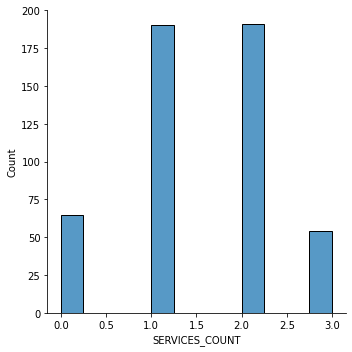

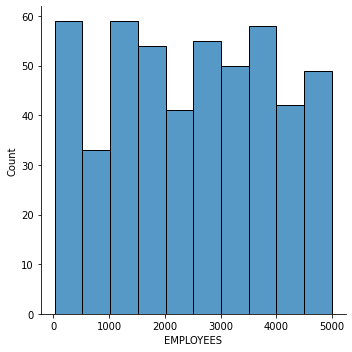

In [27]:
sns.displot(df, x ="SERVICES_COUNT")
sns.displot(df, x ="EMPLOYEES")


The distributions for the employee count suggest the dataset is forming something like a uniform distribution and the services count a very rough bell curve. Considering the distribution graphs and the scatterplot below, it wouldn't be indicative of anything in particular. This makes sense as we used a randomized dataset for this sample case study.

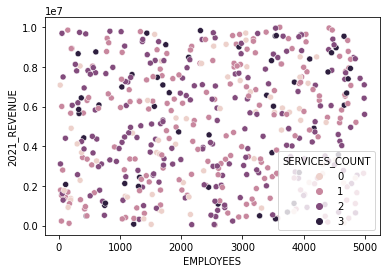

In [28]:
sns.scatterplot(x = "EMPLOYEES",
               y = "2021_REVENUE",
               data = df,
               hue = "SERVICES_COUNT")
plt.show()

Let's say that as a data analyst, I am presenting above findings to a stakeholder who is interested in how the insights were investigated and what kind of steps I took to make sure I am maximizing the data quality. I would point out a few things:

1. When calculating the correlations between data, I am eliminating any client with 0 or NULL values as their number of employees and revenue from 2021. Doing so prevents the possibility that missing values are skewing the results.
2. Overall, there is low correlation between days it took a client to convert and employee count, 2021 revenue, and Cloudflare services utilized respectively. The data insight from the given dataset is inconclusive, and I would suggest looking at additional data to do further investigation or investigate how we retrieved this data.
3. From the distribution graphs and scatterplot above, I would describe the dataset as randomly distributed (which for this case study specifically, it very much is!)

### Conclusion

From this sample case study with a hypothetical stakeholder, what I hope to communicate is the following:
- How this dataset was acquired, cleaned, and wrangled to produce insights.
- What KPI's are closely associated with a "converting behavior".
- Provide a roadmap based on the data above. Assuming we were using valid data, we could utilize the insight above to collaborate with some data scientists to make a regression model that predicts how likely a client is to convert soon.
- Strategize how we can pivot current clients to these behaviors and also invest more into acquiring clients that already satisfy such conditions.
